In [182]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [183]:
df = pd.read_csv('./inv3_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

In [184]:
df['time'] = df.index
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'Tcell']=pd.Series((df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)), df.index)
df.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df['Irradiance(W/㎡)']/1000*(1-0.0045*(df['Tcell']-25))*20.5/100), df.index)
df.loc[:,'Hieu suat']=pd.Series((df['Total input power(kW)']*1000/df['Pm']*100), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df=df[df['Ambient temperature(℃)']>6]
df=df[df['Irradiance(W/㎡)']>300]
df=df[df['Total input power(kW)']>76]
df=df[df['Hieu suat']<80]
df=df[(df['Inverter status']=='Grid connected')|(df['Inverter status']=='Grid connected : power limited')]
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Site Name,Management Domain,ManageObject_x,Ambient temperature(℃),PV Temperature(℃),Wind speed(m/s),Wind direction(°),Daily irradiation(MJ/㎡),...,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-04 10:25:00,105,105,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.0,2.4,NaN,4.252,...,4,10,4,Friday,106,82,34.078750,110454.046175,79.951802,2022-03-04
2022-03-04 10:30:00,106,106,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.9,4.5,NaN,4.197,...,4,10,4,Friday,106,82,34.449375,118813.559666,75.456876,2022-03-04
2022-03-04 10:35:00,107,107,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,44.7,0.8,NaN,4.444,...,4,10,4,Friday,106,82,34.868125,119011.502009,75.869978,2022-03-04
2022-03-04 10:40:00,108,108,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,45.6,2.0,NaN,4.692,...,4,10,4,Friday,106,82,34.773750,116890.161554,75.945656,2022-03-04
2022-03-04 10:45:00,109,109,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.6,46.5,3.0,NaN,4.942,...,4,10,4,Friday,106,82,35.882500,121064.251210,75.443410,2022-03-04
2022-03-04 10:50:00,110,110,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,31.3,47.2,2.2,NaN,5.194,...,4,10,4,Friday,106,82,36.598125,121011.192164,75.342618,2022-03-04
2022-03-04 10:55:00,111,111,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.7,47.5,1.5,NaN,5.447,...,4,10,4,Friday,106,82,36.038750,122262.928170,75.404705,2022-03-04
2022-03-04 11:00:00,112,112,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,31.4,49.2,2.4,NaN,5.403,...,4,11,4,Friday,107,83,36.660625,120119.023526,77.381581,2022-03-04
2022-03-04 11:05:00,113,113,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,31.9,48.6,2.1,NaN,5.467,...,4,11,4,Friday,107,83,37.328125,123550.739058,77.072789,2022-03-04


In [185]:
df1=df.groupby(['month','date','hour'])['Hieu suat','Total input power(kW)'].max()
df1=df1.reset_index()
print(df1)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

     month        date  hour  Hieu suat  Total input power(kW)
0        3  2022-03-04    10  79.951802                 92.192
1        3  2022-03-04    11  77.381581                 95.224
2        3  2022-03-19    12  69.130781                 91.658
3        3  2022-03-19    13  65.840950                 83.941
4        3  2022-03-20    12  56.832275                 77.717
..     ...         ...   ...        ...                    ...
711      8  2022-08-24    11  77.388002                 98.246
712      8  2022-08-24    12  79.484954                102.492
713      8  2022-08-24    13  78.864286                 98.754
714      8  2022-08-24    14  79.901168                 91.700
715      8  2022-08-25     9  78.216360                 76.382

[716 rows x 5 columns]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11564\1542463090.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [186]:
df1['stt']=df1.index
df_binary = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_binary.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_binary.head() 
  
# Displaying only the 1st  rows along with the column names 

,stt,Hieu suat
0,0,79.951802
1,1,77.381581
2,2,69.130781
3,3,65.840950
4,4,56.832275


-0.003427474870145275


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11564\3909986184.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11564\3909986184.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



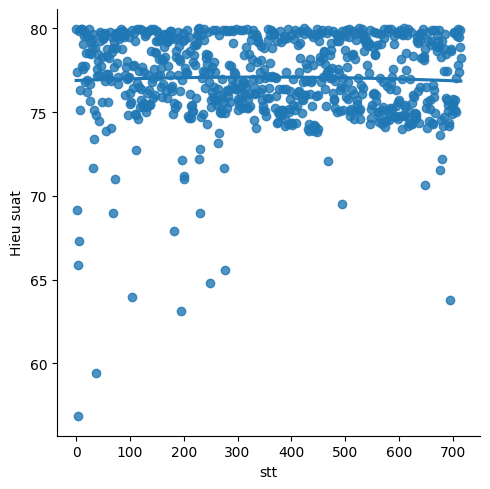

In [187]:
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary, order = 2, ci = None)
# Eliminating NaN or missing input numbers 
df_binary.fillna(method ='ffill', inplace = True)
X = np.array(df_binary['stt']).reshape(-1, 1) 
y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_binary.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

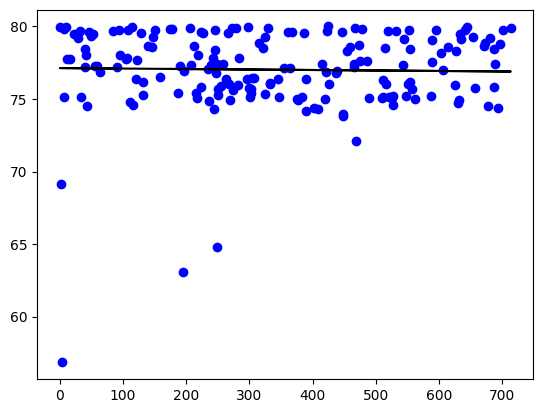

In [188]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

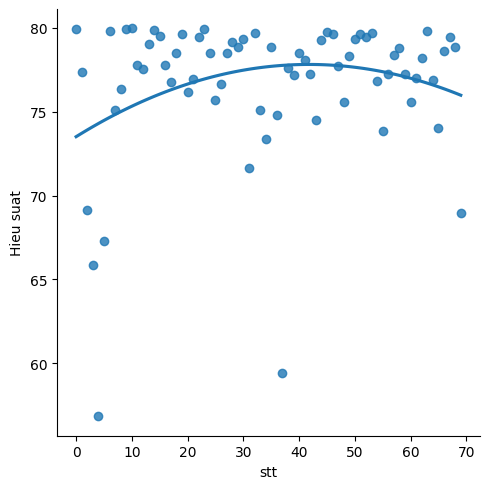

In [189]:
df_binary1 = df_binary[:][:70]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary1, 
                               order = 2, ci = None)

In [190]:
df_binary1.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary1['stt']).reshape(-1, 1) 
y = np.array(df_binary1['Hieu suat']).reshape(-1, 1) 
  
df_binary1.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

-0.3393862343972862


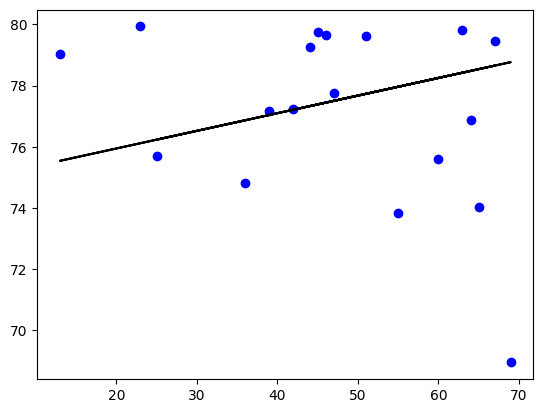

In [191]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

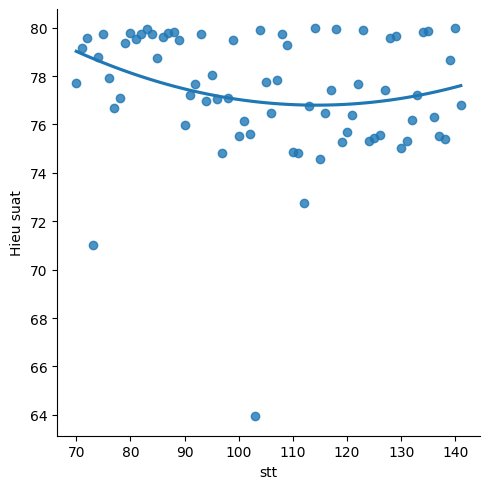

In [192]:
df_binary2 = df_binary[:][70:142]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary2, 
                               order = 2, ci = None)

In [193]:
df_binary2.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary2['stt']).reshape(-1, 1) 
y = np.array(df_binary2['Hieu suat']).reshape(-1, 1) 
  
df_binary2.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.06672250024661219


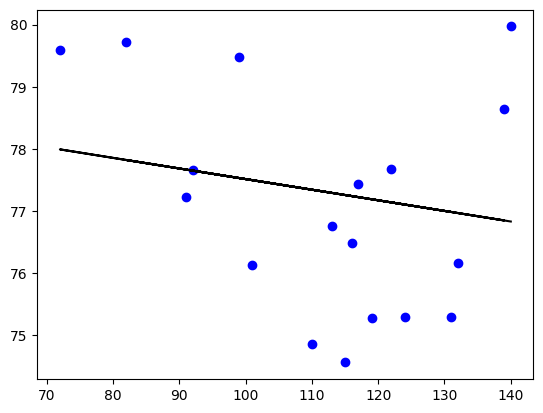

In [194]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

In [195]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

Estimated coefficients:
b_0 = 77.03621217833008
b_1 = -5.051130279131272e-05


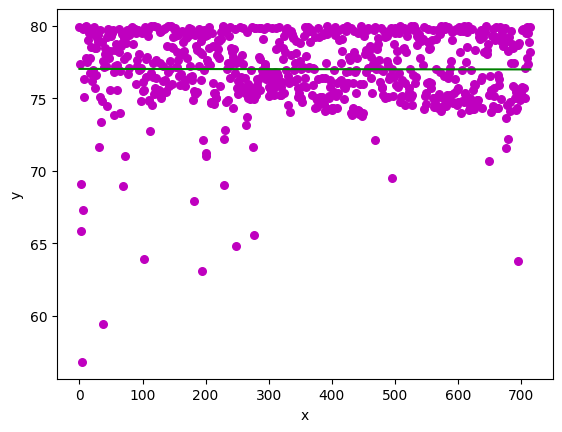

In [196]:
df1['stt']=df1.index
df_bin = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_bin.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_bin.head() 
x=df_bin['stt'].tolist()
y=df_bin['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred= b[0] + b[1]*x
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=y_pred,
    name="Hiệu suất tuyến tính inverter 3 "))
fig.show()

Estimated coefficients:
b_0 = 77.17133154982118
b_1 = -0.0015480457599314275


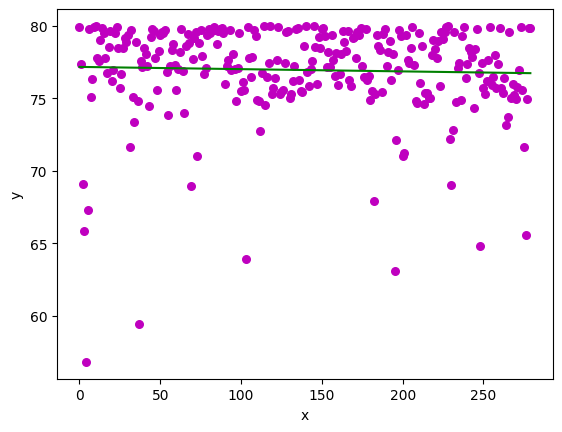

Estimated coefficients:
b_0 = 77.41903913946959
b_1 = -0.0007247646022170262


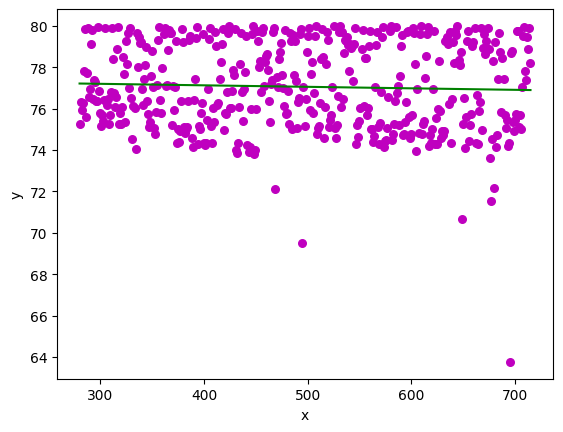

In [197]:
df2=df1[df1['month']<6]
df3=df1[df1['month']>=6]
df_bin2 = df2[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_bin2.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_bin2.head() 
df_bin3 = df3[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_bin3.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_bin3.head() 
x=df_bin2['stt'].tolist()
y=df_bin2['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred2= b[0] + b[1]*x
x=df_bin3['stt'].tolist()
y=df_bin3['Hieu suat'].tolist()
x=np.array(x)
y=np.array(y)
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}\nb_1 = {}".format(b[0], b[1])) 
plot_regression_line(x, y, b) 
y_pred3= b[0] + b[1]*x
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df2['date'],
    y=df2['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig2.add_trace(go.Scatter(
    x=df2['date'],
    y=df2['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig2.add_trace(go.Scatter(
    x=df2['date'],
    y=y_pred2,
    name="Hiệu suất tuyến tính inverter 3 thang3,4,5"))
fig2 . update_traces (
    showlegend = True 
    )
fig2.update_xaxes(
    rangeslider_visible=True,
    )   
fig2.show()
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['Total input power(kW)'],
    name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig3.add_trace(go.Scatter(
    x=df3['date'],
    y=df3['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig3.add_trace(go.Scatter(
    x=df3['date'],
    y=y_pred3,
    name="Hiệu suất tuyến tính inverter 3 thang6,7,8"))
fig3 . update_traces (
    showlegend = True 
    )
fig3.update_xaxes(
    rangeslider_visible=True,
    )   
fig3.show()